c:\Users\99sma\OneDrive\Desktop\credit-risk-project\venv\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


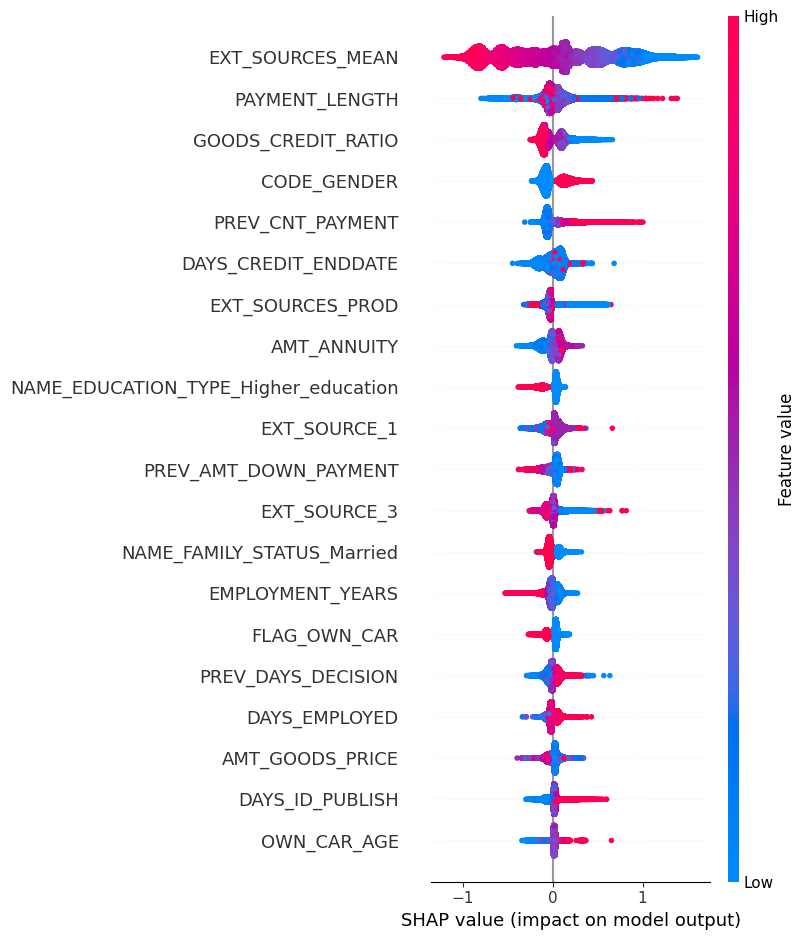

In [2]:
import shap
import joblib
import pandas as pd

# Load model and data
model = joblib.load("../models/lightgbm_model.pkl")
X = pd.read_csv("../data/processed/X_all.csv")

# Make sure feature names are clean
import re
X.columns = [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in X.columns]

# Use TreeExplainer explicitly
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X)


In [3]:
# Summary bar plot
shap.plots.bar(shap_values, max_display=30)


TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [4]:
shap.plots.beeswarm(shap_values, max_display=30)


TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
# Choose a top feature from SHAP summary
top_feature = X.columns[shap_values.abs.sum(0).values.argsort()[-1]]  # highest importance

# SHAP dependence plot for that feature
shap.plots.scatter(shap_values[:, top_feature], color=shap_values)


In [ ]:
# Show force plot for a single row
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0], matplotlib=True)


In [ ]:
# Save SHAP values (optional)
import numpy as np
np.save("../models/shap_values.npy", shap_values.values)
X.to_csv("../models/shap_input.csv", index=False)
print("📦 SHAP values and input saved.")


✅ XGBoost SHAP values generated.


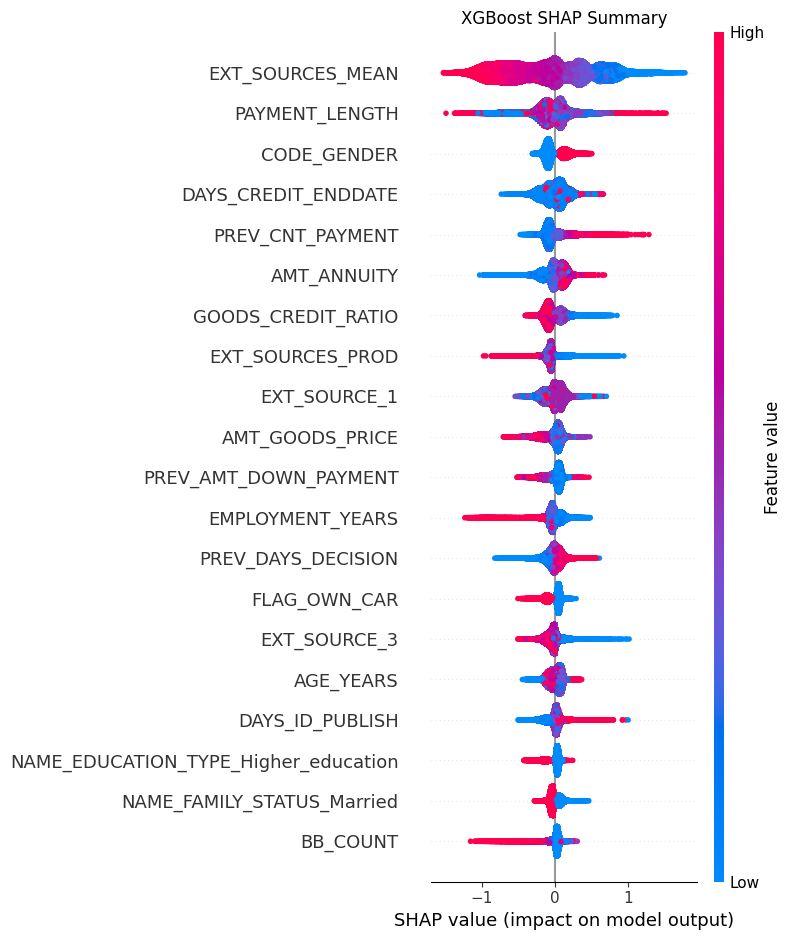

c:\Users\99sma\OneDrive\Desktop\credit-risk-project\venv\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


✅ LightGBM SHAP values generated.


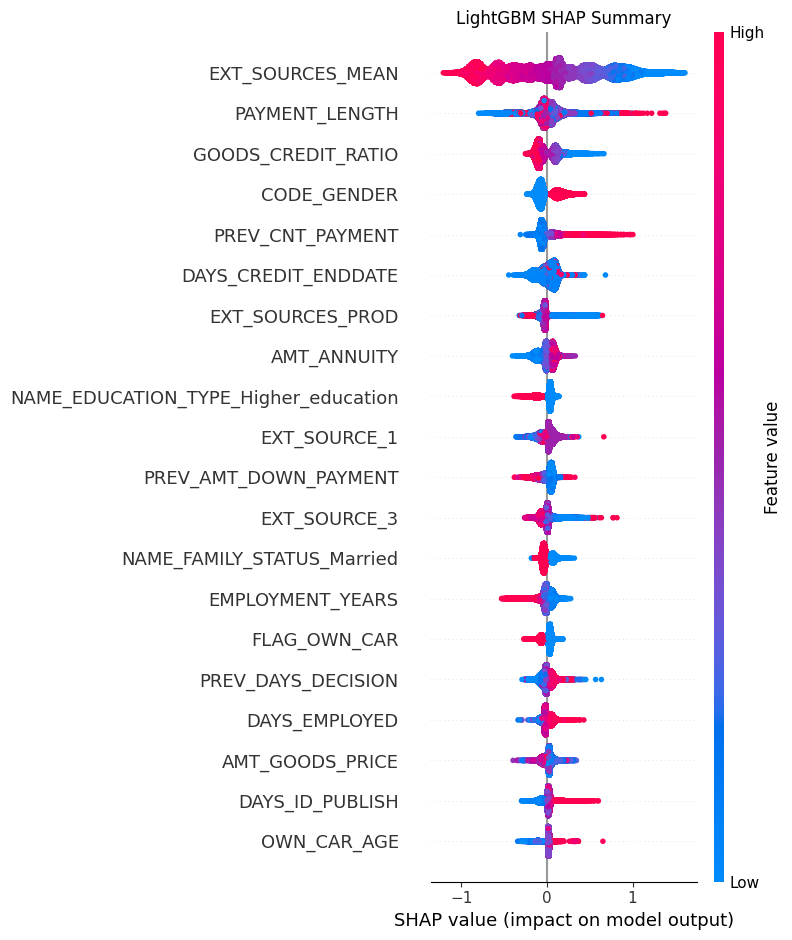

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:81: At position 137 should be feature with name NAME_EDUCATION_TYPE_Secondary___secondary_special (found NAME_EDUCATION_TYPE_Secondary_/_secondary_special).

In [5]:
# Cell 1: Imports
import shap
import joblib
import pandas as pd
import os
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

shap.initjs()

# Cell 2: Load data
X = pd.read_csv("../data/processed/X_all.csv")

# Clean feature names (for LightGBM compatibility)
X.columns = [col.replace(" ", "_").replace("-", "_").replace(",", "_").replace("(", "").replace(")", "") for col in X.columns]

# Cell 3: SHAP for XGBoost
xgb_model = joblib.load("../models/xgboost_model.pkl")
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X)

print("✅ XGBoost SHAP values generated.")
shap.summary_plot(shap_values_xgb, X, show=False)
plt.title("XGBoost SHAP Summary")
plt.tight_layout()
plt.show()

# Cell 4: SHAP for LightGBM
lgb_model = joblib.load("../models/lightgbm_model.pkl")
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X)

print("✅ LightGBM SHAP values generated.")
shap.summary_plot(shap_values_lgb, X, show=False)
plt.title("LightGBM SHAP Summary")
plt.tight_layout()
plt.show()

# Cell 5: SHAP for CatBoost
cat_model = joblib.load("../models/catboost_model.pkl")
# Ensure CatBoost is fitted with Pool for SHAP
explainer_cat = shap.TreeExplainer(cat_model)
shap_values_cat = explainer_cat.shap_values(X)

print("✅ CatBoost SHAP values generated.")
shap.summary_plot(shap_values_cat, X, show=False)
plt.title("CatBoost SHAP Summary")
plt.tight_layout()
plt.show()

# Cell 6: SHAP for Logistic Regression — Optional fallback using KernelExplainer (slow)
try:
    lr_model = joblib.load("../models/logistic_model.pkl")
    explainer_lr = shap.Explainer(lr_model.predict_proba, X, algorithm="permutation")
    shap_values_lr = explainer_lr(X)

    print("✅ Logistic Regression SHAP values generated.")
    shap.summary_plot(shap_values_lr, X, show=False)
    plt.title("Logistic Regression SHAP Summary")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("⚠️ Logistic Regression SHAP skipped:", e)

# Cell 7: SHAP for Blended Model — Not supported (VotingClassifier)
print("⚠️ Blended Model (VotingClassifier) does not support SHAP directly. Skipping.")
